# Ambiente De Execução
Github: https://github.com/victorlima090/Clusterizacao
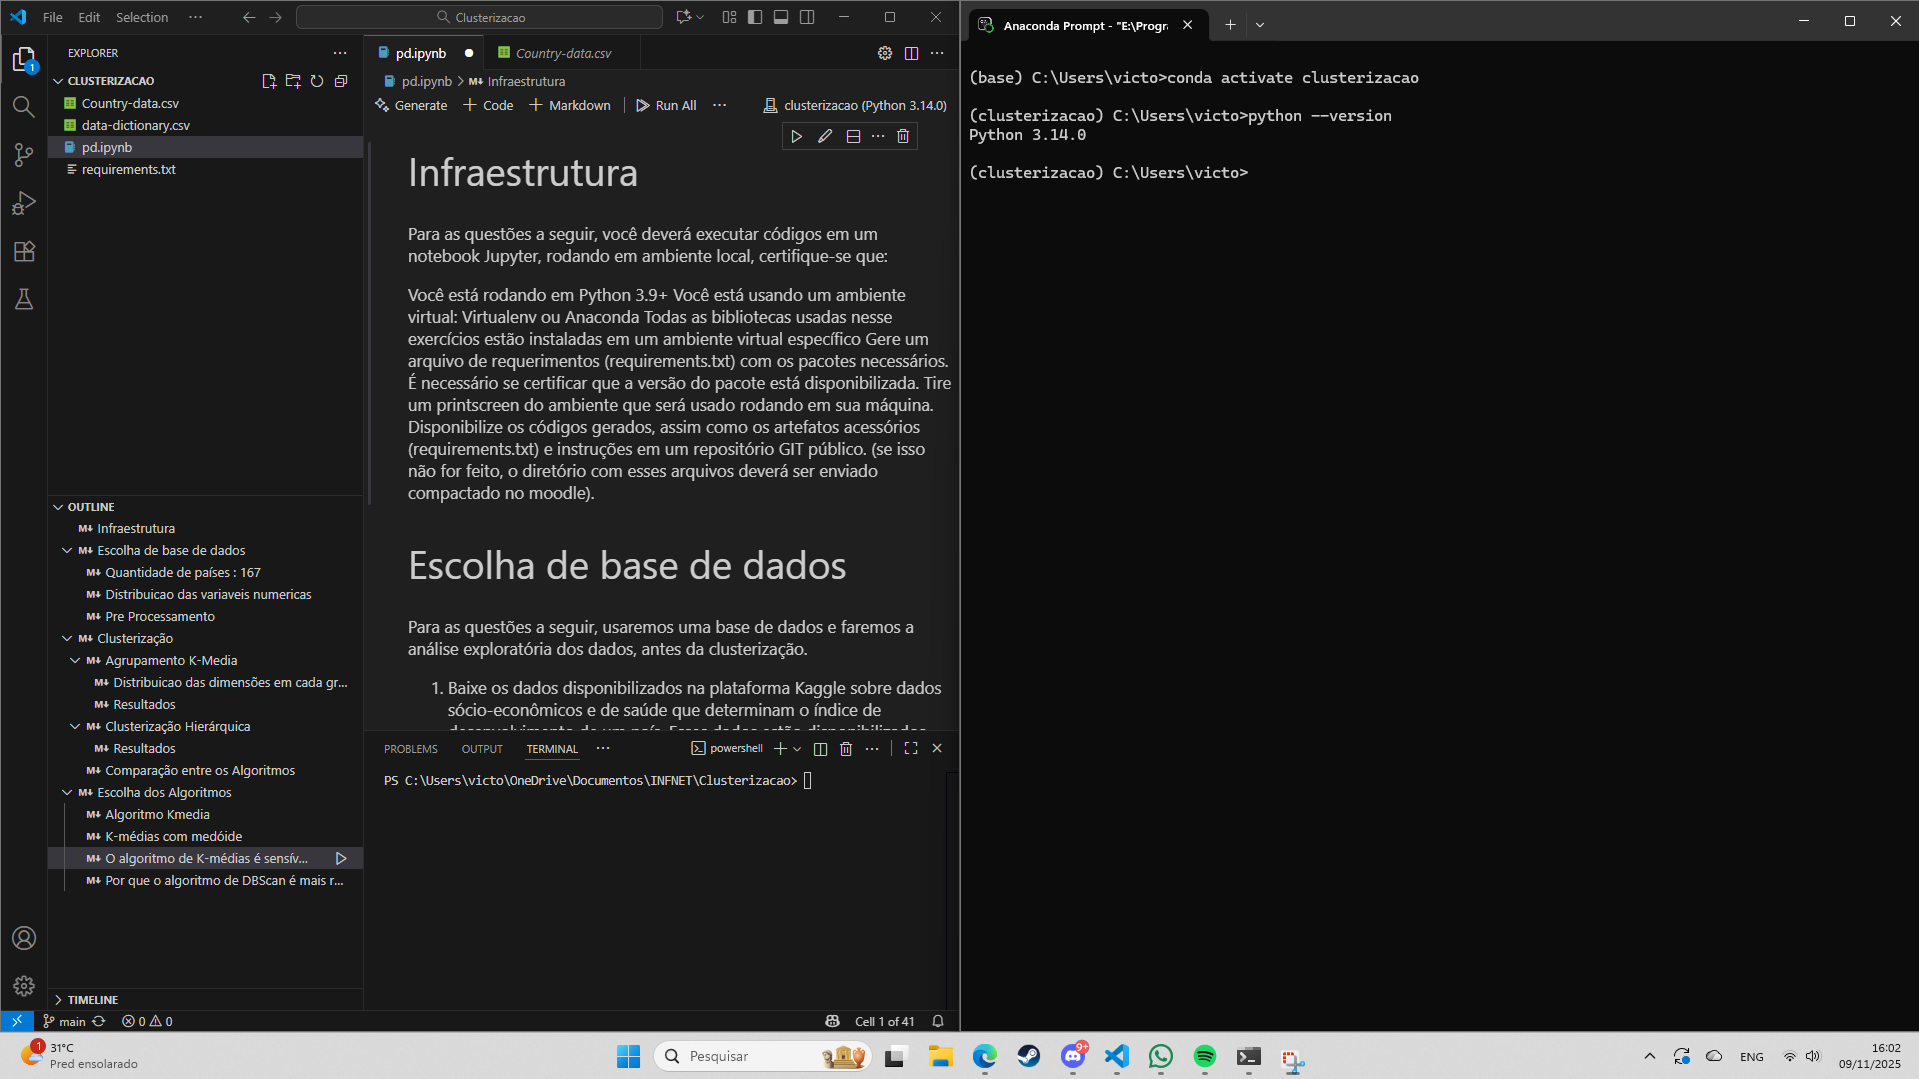

# Infraestrutura
Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

Você está rodando em Python 3.9+
Você está usando um ambiente virtual: Virtualenv ou Anaconda
Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico
Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
Tire um printscreen do ambiente que será usado rodando em sua máquina.
Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

# Escolha de base de dados
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
2. Quantos países existem no dataset?
3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
4. Realize o pré-processamento adequado dos dados.

In [14]:
import pandas as pd
df = pd.read_csv("Country-data.csv")

In [15]:
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

## Quantidade de países : 167

In [17]:
uniqueCountries = df['country'].nunique()
print("Quantidade de países :", uniqueCountries)

Quantidade de países : 167


## Distribuicao das variaveis numericas

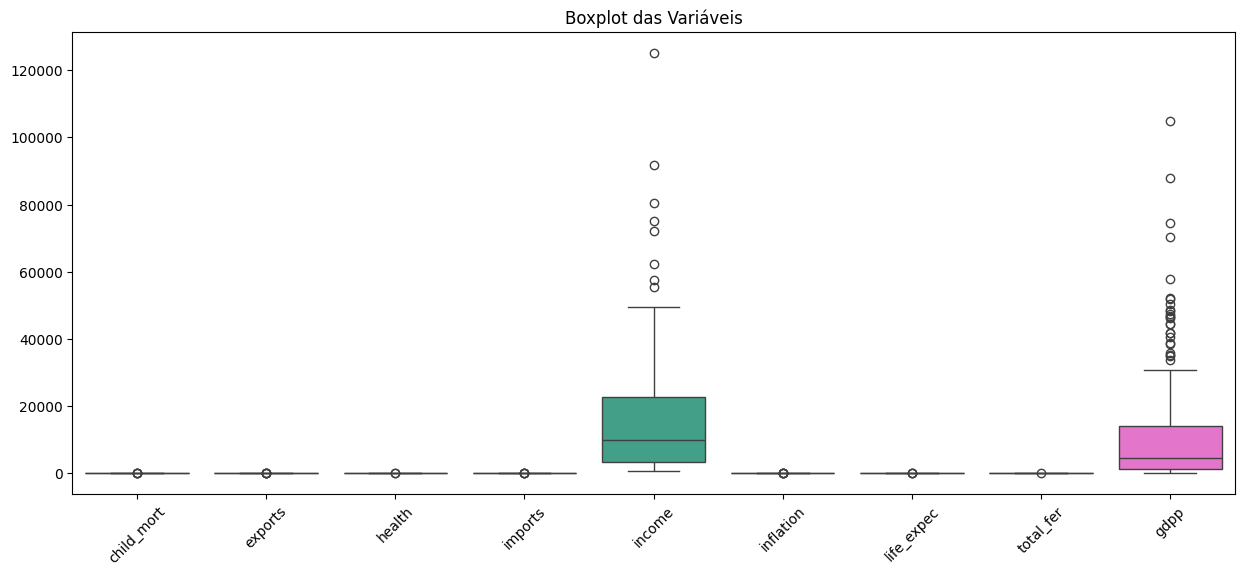

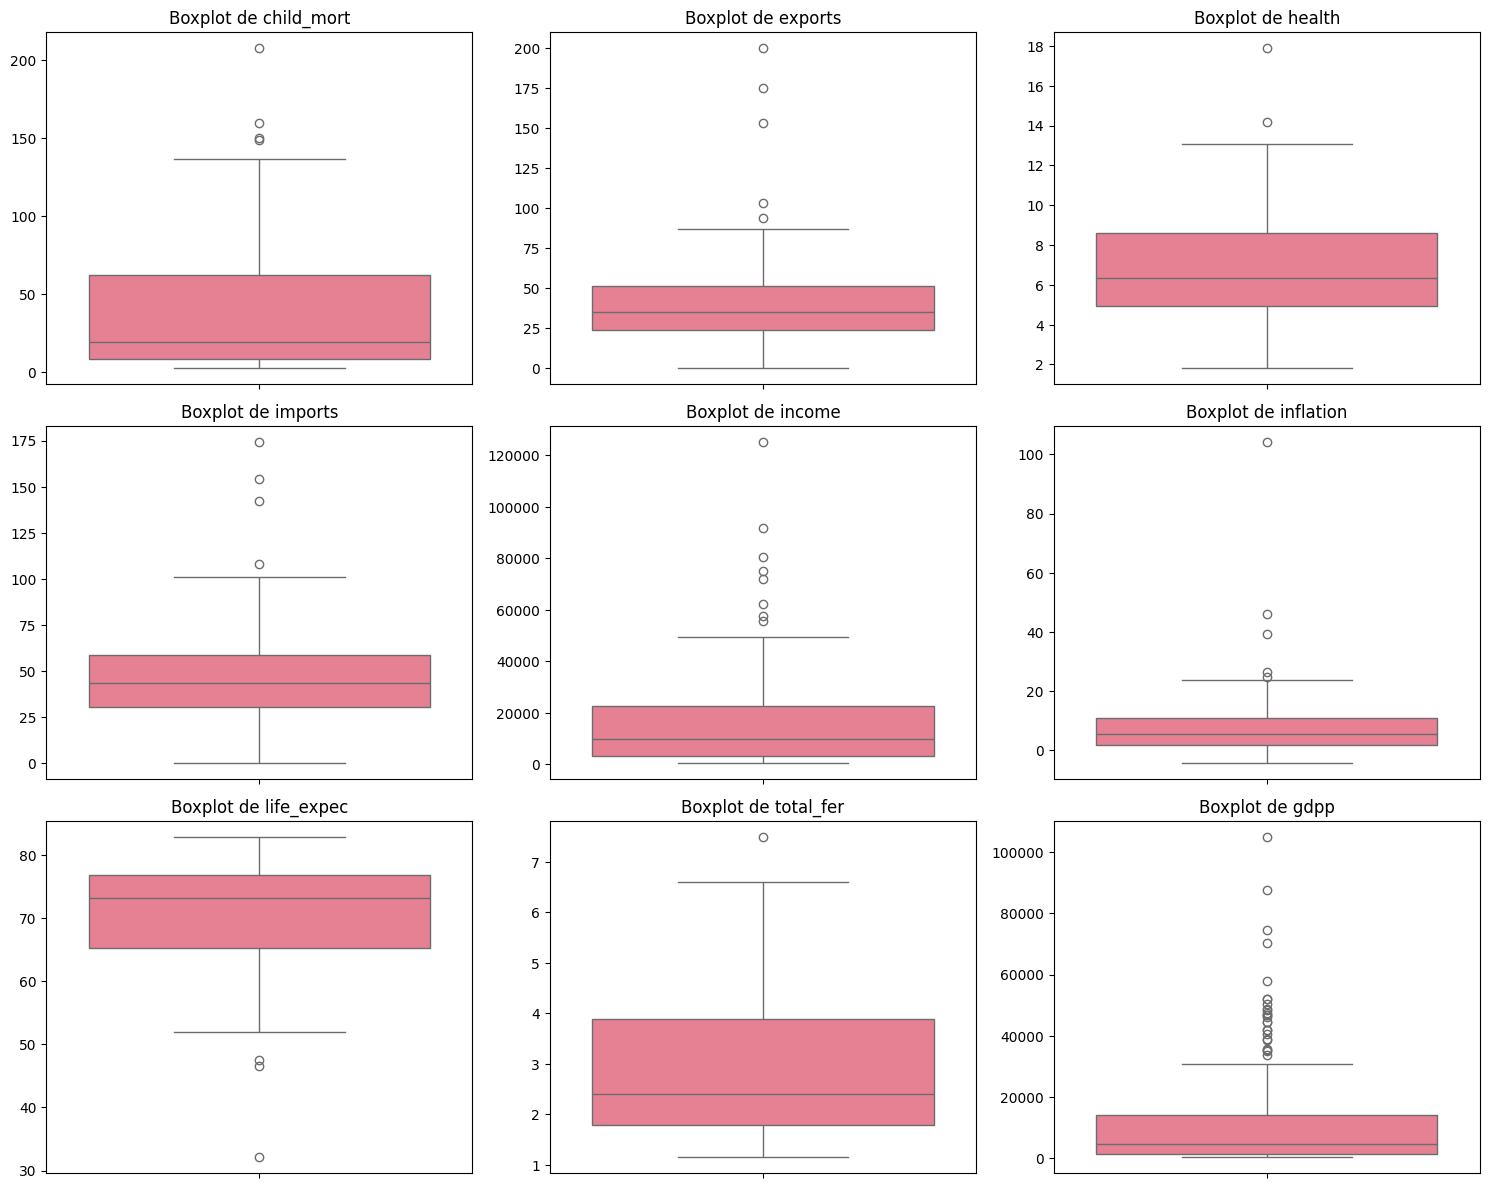

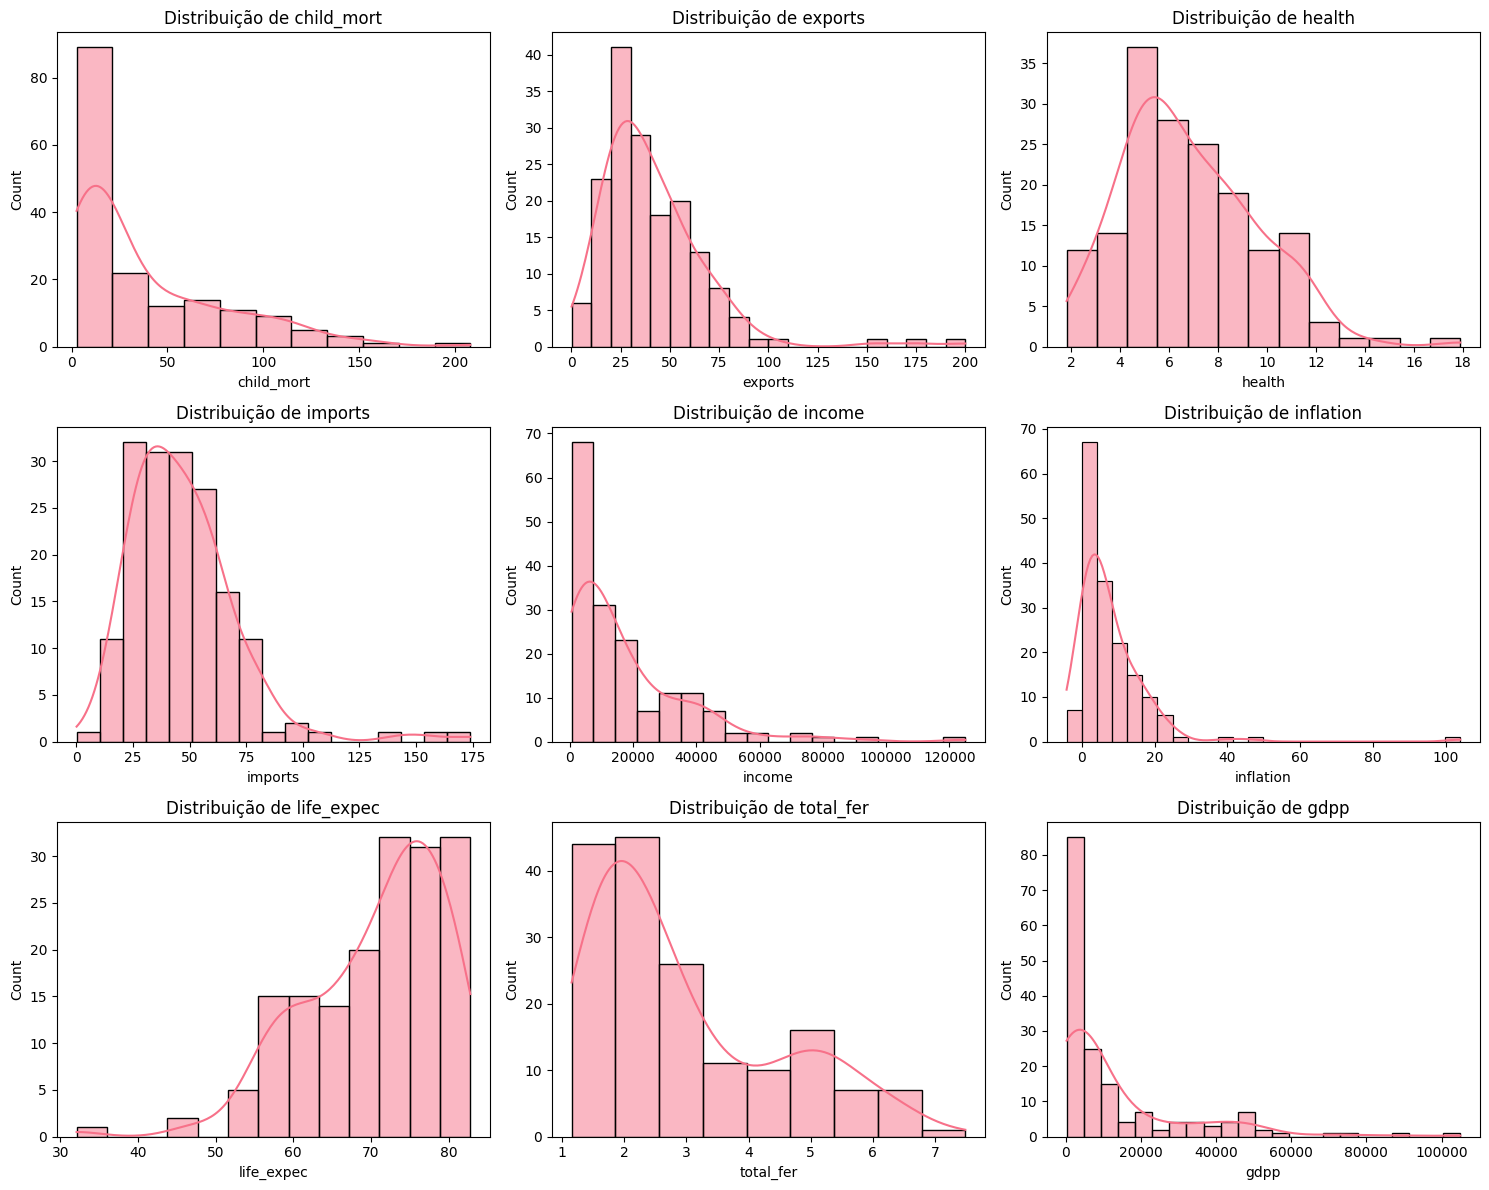

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo
# plt.style.use('seaborn')
sns.set_palette("husl")

# Selecionando apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Criando subplots para boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot das Variáveis')
plt.show()


# Criando subplots para boxplots individuais
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {col}')
    axes[idx].set_ylabel('')  # Remove y-label para melhor visualização

plt.tight_layout()
plt.show()


# Criando subplots para distribuições
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()


Como visto nos gráficos acima, devemos normalizar nossas variveis, uma vez que cada possui faixas de valores muito distintos entre si. Portanto, vamos usar o RobustScaler  para realizar essa tarefa, pois ele consegue lidar melhor com outliers.

## Pre Processamento

In [19]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

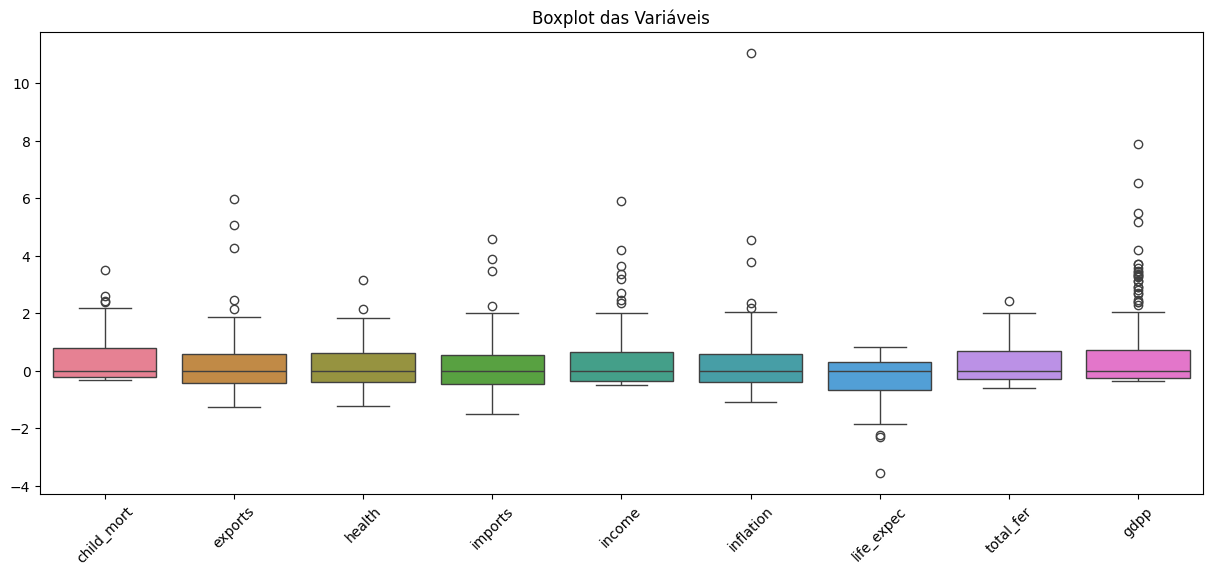

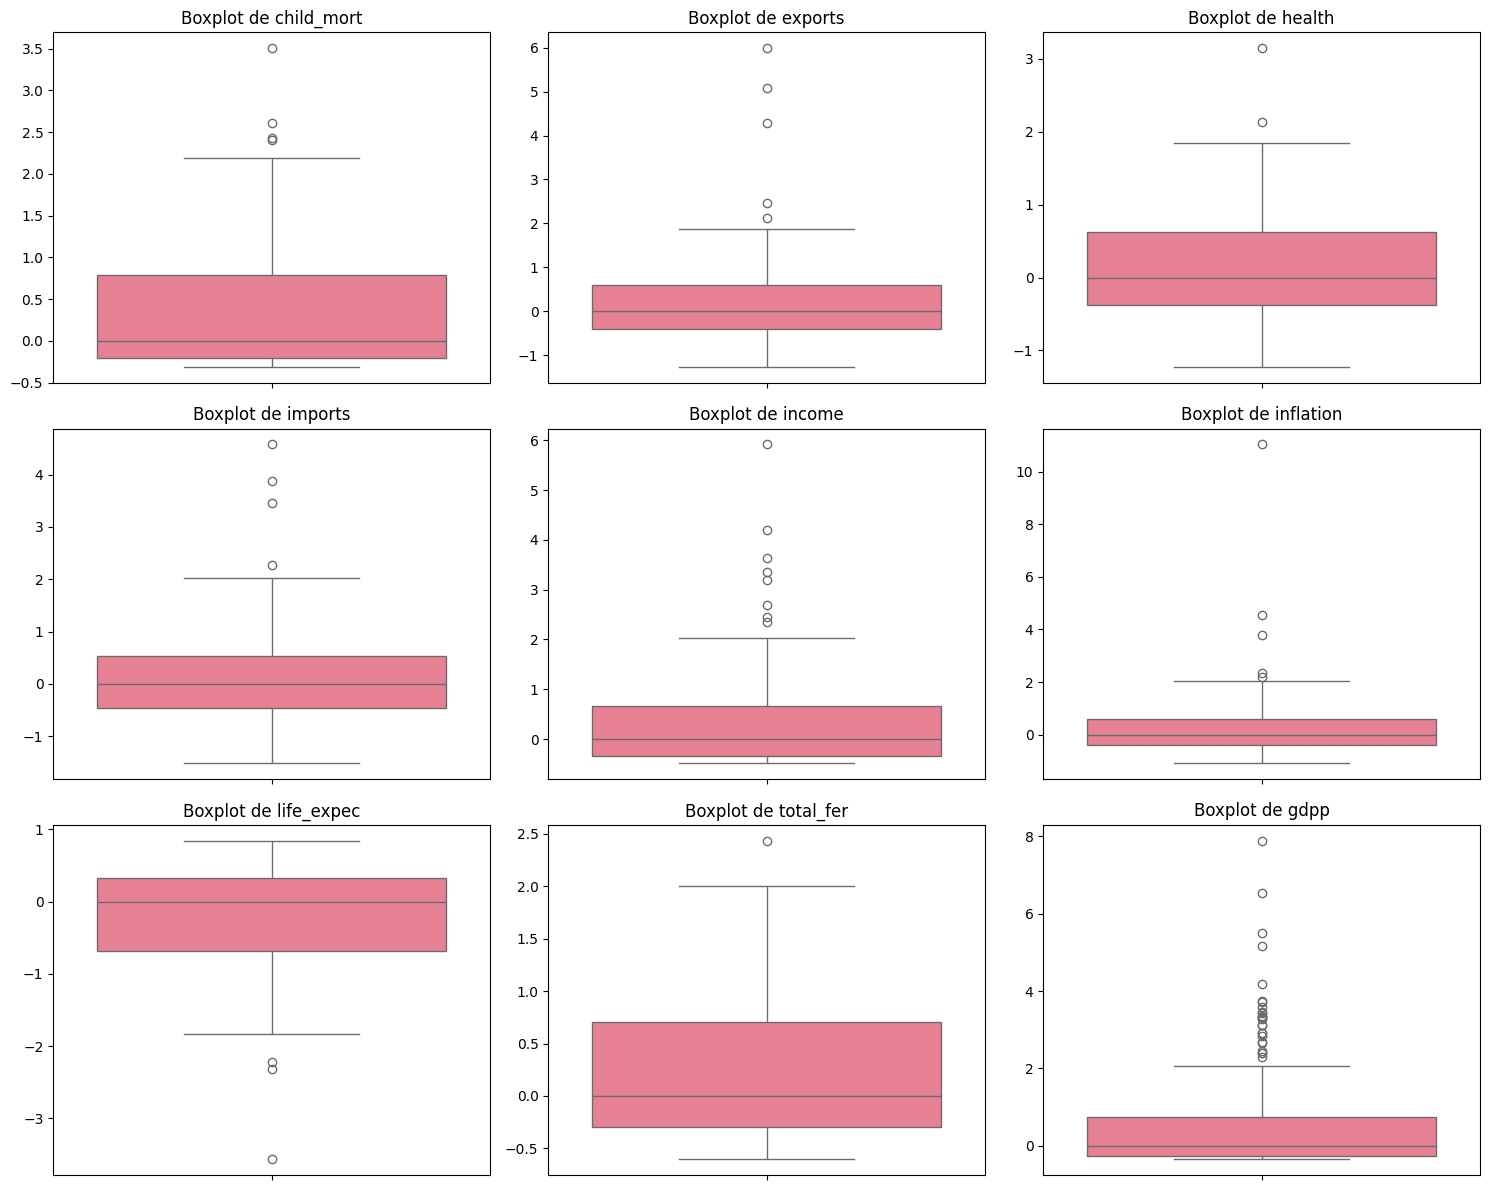

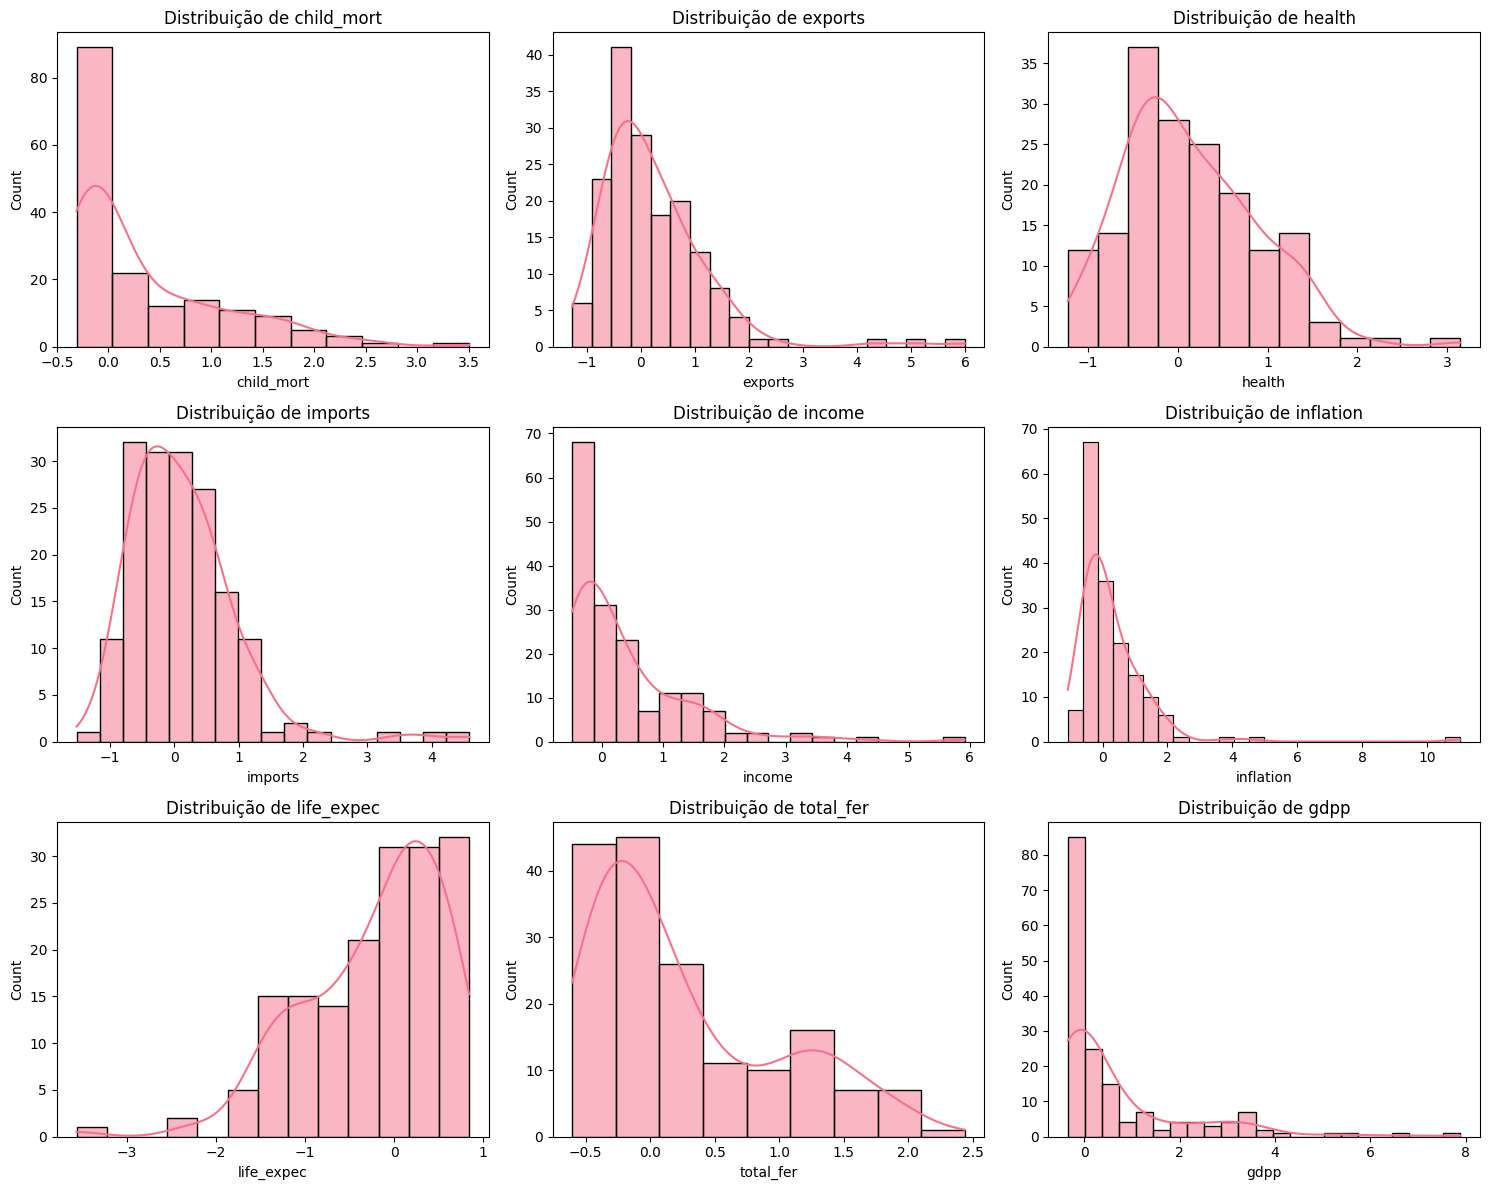

In [20]:
# Criando subplots para boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot das Variáveis')
plt.show()


# Criando subplots para boxplots individuais
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {col}')
    axes[idx].set_ylabel('')  # Remove y-label para melhor visualização

plt.tight_layout()
plt.show()


# Criando subplots para distribuições
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

# Clusterização
Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
    a. K-Médias
    b. Clusterização Hierárquica
2. Para os resultados, do K-Médias:

    a. Interprete cada um dos clusters obtidos citando:

        i. Qual a distribuição das dimensões em cada grupo
        ii. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique
3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados
4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

## Agrupamento K-Media

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df[numeric_columns])

df['Cluster'] = kmeans.labels_
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877,2
1,Albania,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811,0
2,Algeria,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723,0
3,Angola,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836,2
4,Antigua and Barbuda,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.183844,0.421053,-0.290761,0.329247,-0.360504,-0.309843,-0.878261,0.522782,-0.132862,0
163,Venezuela,-0.040854,-0.235935,-0.383152,-0.900175,0.336333,4.531320,0.200000,0.028777,0.694969,2
164,Vietnam,0.074280,1.343013,0.141304,1.292469,-0.281306,0.750559,0.000000,-0.220624,-0.263365,0
165,Yemen,0.687094,-0.181488,-0.309783,-0.311734,-0.281821,2.036913,-0.486957,1.083933,-0.263365,2


### Distribuicao das dimensões em cada grupo

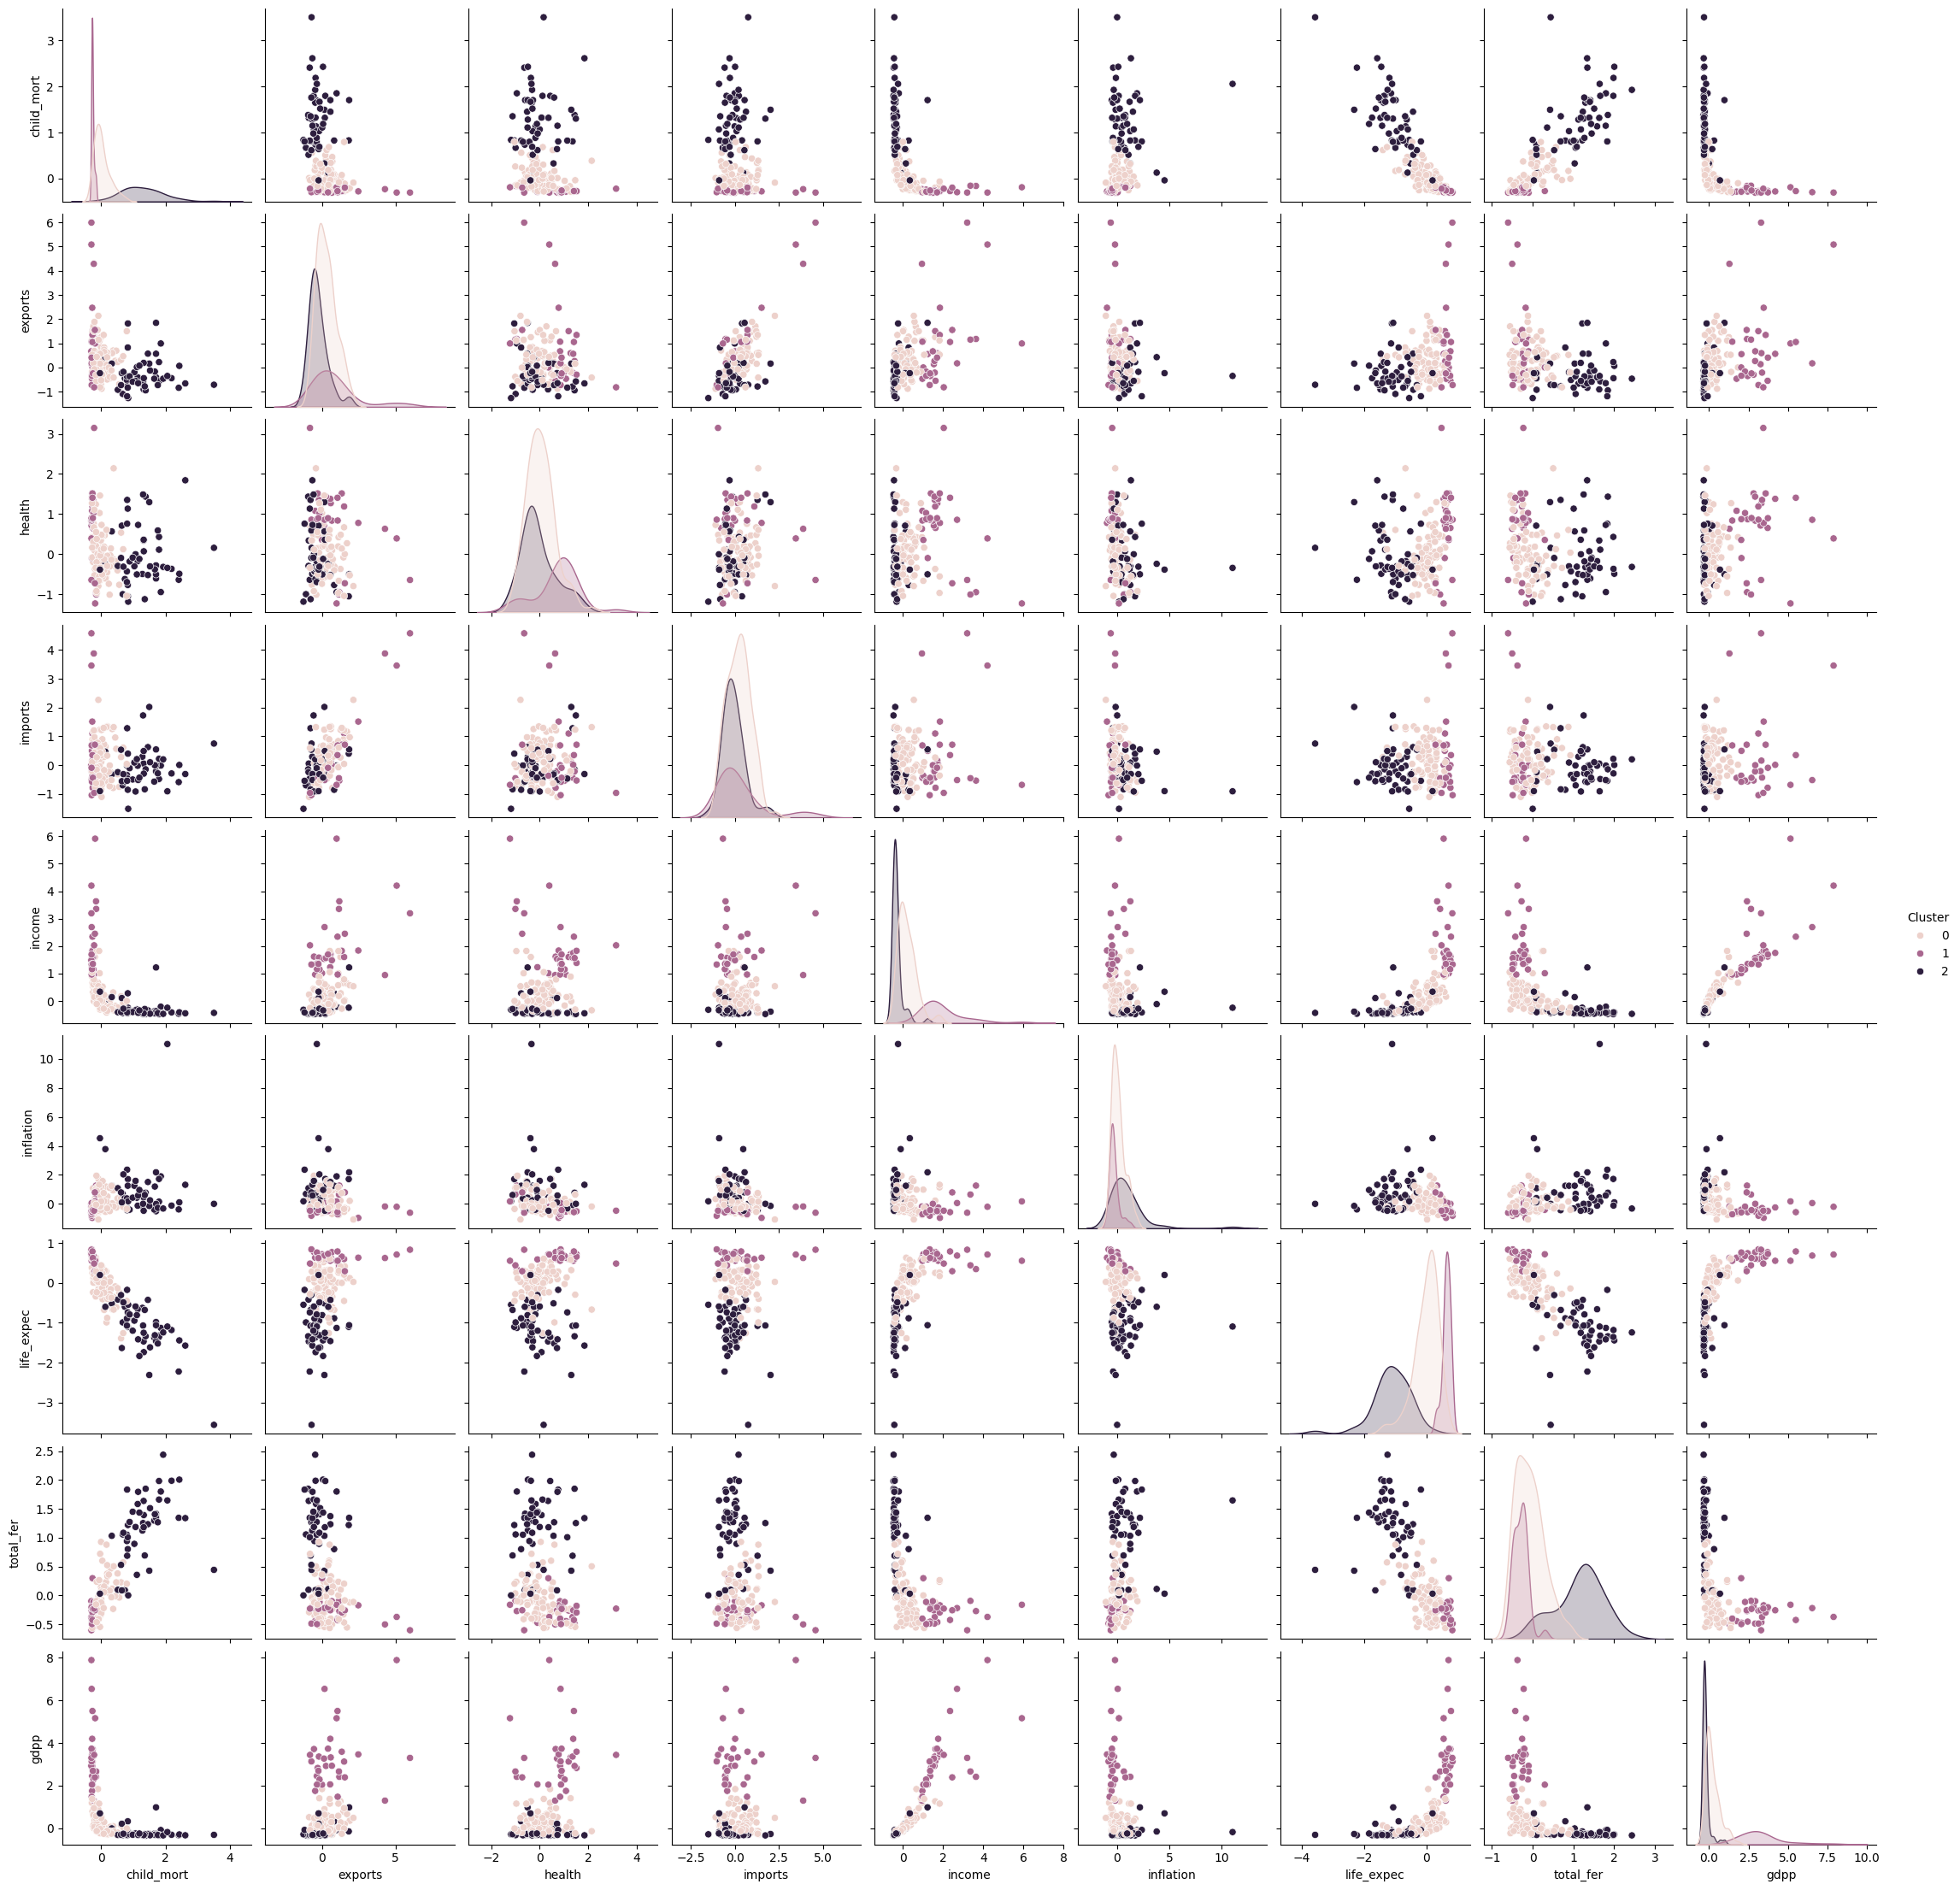

In [22]:
sns.pairplot(df, hue='Cluster', vars=numeric_columns, diag_kind='kde')

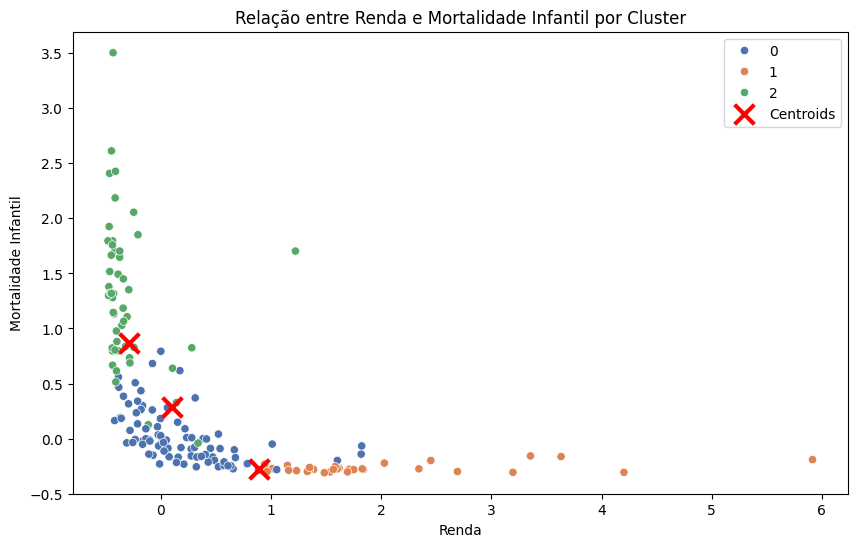

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='income',
    y='child_mort',
    hue='Cluster',
    palette='deep'
)

# Adicionar centroides ao plot
plt.scatter(
    kmeans.cluster_centers_[:, df.columns.get_loc('income')],
    kmeans.cluster_centers_[:, df.columns.get_loc('child_mort')],
    c='red',
    marker='x',
    s=200,
    linewidths=3,
    label='Centroids'
)

plt.title('Relação entre Renda e Mortalidade Infantil por Cluster')
plt.xlabel('Renda')
plt.ylabel('Mortalidade Infantil')
plt.legend()
plt.show()

In [24]:
import numpy as np
def getDistanceFromCentroid(row, centroid):
    # Calcula a distância euclidiana entre um ponto (row) e um centroide
    return np.sqrt(np.sum((row - centroid) ** 2))
df['Distance_to_centroid'] = df.apply(lambda row: getDistanceFromCentroid(row[numeric_columns], kmeans.cluster_centers_[row['Cluster']]), axis=1)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Distance_to_centroid
0,Afghanistan,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877,2,1.079250
1,Albania,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811,0,0.781670
2,Algeria,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723,0,1.505197
3,Angola,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836,2,2.046179
4,Antigua and Barbuda,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767,0,0.885805


In [25]:
cluster_results = []

for cluster_num in range(3):
    # Get cluster data
    cluster_data = df[df['Cluster'] == cluster_num]
    cluster_countries = cluster_data['country'].tolist()
    representative = df.loc[df[df['Cluster']==cluster_num]['Distance_to_centroid'].idxmin(), 'country']
    
    # Calculate means for numeric columns
    cluster_means = cluster_data[numeric_columns].mean()
    
    # Create result dictionary
    result_dict = {
        'Cluster': cluster_num,
        'Representative Country': representative,
        'Number of Countries': len(cluster_countries),
        'Countries': ', '.join(cluster_countries)
    }
    
    # Add means for each numeric column
    for col in numeric_columns:
        result_dict[f'Mean {col}'] = cluster_means[col]
    
    cluster_results.append(result_dict)

# Create DataFrame and display with better formatting
results_df = pd.DataFrame(cluster_results)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(results_df)

,Cluster,Representative Country,Number of Countries,Countries,Mean child_mort,Mean exports,Mean health,Mean imports,Mean income,Mean inflation,Mean life_expec,Mean total_fer,Mean gdpp
0,0,Suriname,85,"Albania, Algeria, Antigua and Barbuda, Argenti...",0.015533,0.284232,0.034303,0.205213,0.196385,0.097887,-0.005115,-0.073692,0.223996
1,1,Austria,31,"Australia, Austria, Belgium, Brunei, Canada, C...",-0.266751,0.864703,0.715200,0.266878,1.962923,-0.293076,0.644039,-0.299064,3.255326
2,2,Ghana,51,"Afghanistan, Angola, Benin, Burkina Faso, Buru...",1.289785,-0.273229,-0.050831,-0.092465,-0.310566,0.891071,-1.107417,1.149480,-0.214314


### Resultados
Pelo grafico acima, podemos ver que o algoritmo separou os países em Desenvolvidos, Emergentes e SubDesenvolvidos:
- Cluster 1: Países Desenvolvidos:
    - Representate: Austria
    - Maior score em Saúde, Renda, Expectativa de Vida e GDPP
    - Menor score em Mortalidade infantil e Inflação
- Cluster 2: Países Subdesenvolvidos:
    - Representate: Ghana
    - Menor score em Saúde, Renda, Expectativa de Vida e GDPP
    - Maior score em Mortalidade infantil e Inflação
- Cluster 0: Países Emergentes:
    - Representante: Suriname
    - Valores ficam entre os dos países Desenvolvidos e Subdesenvolvidos

## Clusterização Hierárquica

In [26]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
h_labels = hierarchical.fit_predict(df[numeric_columns])
df['H_Cluster'] = h_labels

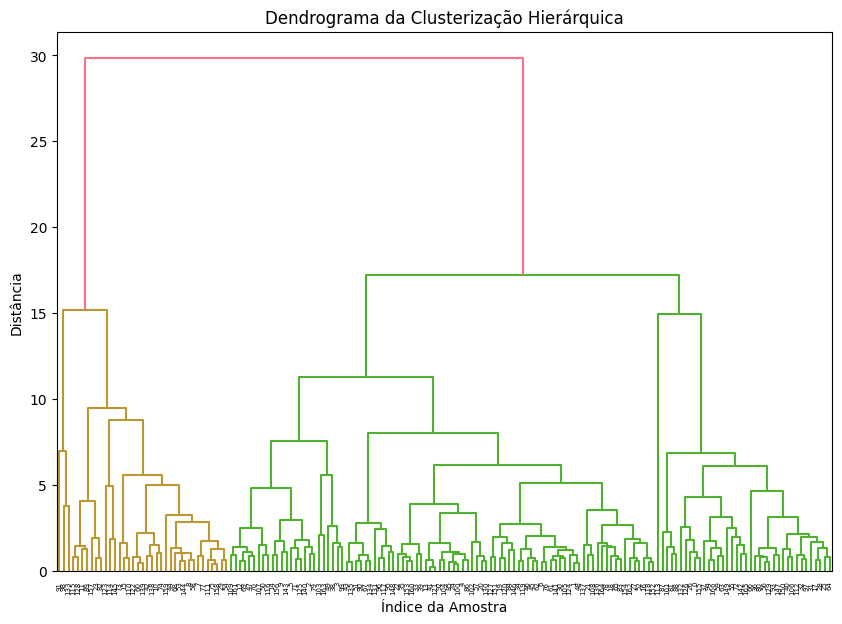

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Criar o dendrograma
plt.figure(figsize=(10, 7))
dendro = dendrogram(linkage(df[numeric_columns], method='ward'))
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
plt.show()

### Resultados

In [28]:
cluster_results = []

for cluster_num in range(3):
    # Get cluster data
    cluster_data = df[df['H_Cluster'] == cluster_num]
    cluster_countries = cluster_data['country'].tolist()

    # Calculate means for numeric columns
    cluster_means = cluster_data[numeric_columns].mean()
    
    # Create result dictionary
    result_dict = {
        'Cluster': cluster_num,
        'Number of Countries': len(cluster_countries),
        'Countries': ', '.join(cluster_countries)
    }
    
    # Add means for each numeric column
    for col in numeric_columns:
        result_dict[f'Mean {col}'] = cluster_means[col]
    
    cluster_results.append(result_dict)

# Create DataFrame and display with better formatting
results_df = pd.DataFrame(cluster_results)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(results_df)

,Cluster,Number of Countries,Countries,Mean child_mort,Mean exports,Mean health,Mean imports,Mean income,Mean inflation,Mean life_expec,Mean total_fer,Mean gdpp
0,0,37,"Australia, Austria, Bahamas, Bahrain, Belgium,...",-0.245878,0.813165,0.558093,0.196904,1.857881,-0.165445,0.584019,-0.265085,2.924273
1,1,38,"Afghanistan, Benin, Burkina Faso, Burundi, Cam...",1.415286,-0.376330,0.191290,-0.022398,-0.380827,0.666652,-1.237986,1.328790,-0.268785
2,2,92,"Albania, Algeria, Angola, Antigua and Barbuda,...",0.153769,0.230916,-0.058956,0.158329,0.080808,0.276830,-0.125142,0.026118,0.120004


Pelo grafico acima, podemos ver que o algoritmo também separou os países em Desenvolvidos, Emergentes e SubDesenvolvidos:
- Cluster 0: Países Desenvolvidos:
    - Maior score em Saúde, Renda, Expectativa de Vida e GDPP
    - Menor score em Mortalidade infantil e Inflação
- Cluster 1: Países Subdesenvolvidos:
    - Menor score em Saúde, Renda, Expectativa de Vida e GDPP
    - Maior score em Mortalidade infantil e Inflação
- Cluster 2: Países Emergentes:
    - Valores ficam entre os dos países Desenvolvidos e Subdesenvolvidos

## Comparação entre os Algoritmos


In [29]:
def hasSameClassification(row):
    if row['Cluster'] == 0:
        return row['H_Cluster'] == 2
    if row['Cluster'] == 1:
        return row['H_Cluster'] == 0
    if row['Cluster'] == 2:
        return row['H_Cluster'] == 1
    return False

df['Same_Classification'] = df.apply(hasSameClassification, axis=1)
same_classification_count = df['Same_Classification'].sum()
print(f"Número de países com a mesma classificação em ambos os algoritmos: {same_classification_count} de {len(df)}")

Número de países com a mesma classificação em ambos os algoritmos: 144 de 167


Através dos resultados obtidos, podemos observar que os algoritmos chegaram em conclusões semelhantes, uma vez que apenas 23 países foram classificados de forma diferente entre os dois algoritimos. Portanto, as médias das features também são muito parecidos entre eles, como por exemplo:
- Expectativa de Vida Países Desenvolvidos:
    - Kmeans: 0.644039
    - Clusterização Hierarquíca: 0.584019
- Renda Países Desenvolvidos:
    - Kmeans: 1.962923
    - Clusterização Hierarquíca: 1.857881	
- Mortalidade Infantil Países Desenvolvidos:
    - Kmeans: -0.266751	
    - Clusterização Hierarquíca: -0.245878

# Escolha dos Algoritmos
1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.
3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

## Algoritmo Kmedia
O algoritmo de K-médias tem o seguinte funcionamento:
- Etapa 1: escolhe pontos aleatorios como centroides dos clusters
- Etapa 2: calcula a distancia de cada ponto para cada um dos centroides e categoriza cada ponto como pertencente ao centroide de menor distancia
- Etapa 3: calcula o novo centroide do cluster atraves da media dos pontos do cluster
- Etapa 4: Repete as etapas 2, 3 e 4 até que o centroide dos cluster não mude mais ou atinga o número máximo de iterações

## K-médias com medóide

O algoritmo de K-médias com medóide tem o seguinte funcionamento:
- Etapa 1: escolhe pontos aleatorios como centroides dos clusters
- Etapa 2: calcula a distancia de cada ponto para cada um dos centroides e categoriza cada ponto como pertencente ao centroide de menor distancia
- Etapa 3: calcula a média das amostra do cluster(baricentro) e escolhe como centroide a amostra mais próxima do baricentro.
- Etapa 4: Repete as etapas 2, 3 e 4 até que o centroide dos cluster não mude mais ou atinga o número máximo de iterações

In [40]:
import math
def euclidean_distance(point1, point2):
  dist = math.sqrt(
      sum(
         (p1 - p2) ** 2  for p1, p2 in zip(point1, point2)
      )
  )

  return dist

In [41]:
import random
def initialize_centroids(data, n_of_clusters):
    return random.sample(data, n_of_clusters)

def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(point)
    return clusters

def getPointClosestToCentroid(cluster,centroid):
    closest_point = min(cluster, key=lambda point: euclidean_distance(point, centroid))
    return closest_point

def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        cluster_classic_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        cluster_medoide = getPointClosestToCentroid(cluster, cluster_classic_centroid)
        new_centroids.append(cluster_medoide)
    return new_centroids


def k_means(data, n_of_clusters, max_iterations=100):
    centroids = initialize_centroids(data, n_of_clusters)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    return centroids, clusters

data = df[numeric_columns].values.tolist()
n_of_clusters = 3   
centroids, clusters = k_means(data, n_of_clusters)

## O algoritmo de K-médias é sensível a outliers nos dados. Explique.
No algortimo d K-médias, o baricentro do cluster é calculado através da media das posições dos elementos do cluster. Dessa forma, um outlier terá um impacto muito grande sobre a média, fazendo com que o baricentro se mova em direção aos outliers, o que é indesejado.

## Por que o algoritmo de DBScan é mais robusto à presença de outliers?

No algoritmo do DBScan, os clusters são formados por amostras que estão próximas umas das outras, portanto, outliers não afetam a formação dos cluters